# <i class="fa-solid fa-dumbbell"></i> Exercises

Please fill the missing code pieces as indicated by the `...`. The imports are always provided at the top of the code chunks. This should give you a hint for which functions/classes to use. Have a look at the online documentation if you are unsure how to use them.

## Exercise 1: Model Selection

Today we are working with the `California Housing dataset`, which you are already familiar with, as we previously used it while exploring resampling method.
This dataset is based on the 1990 U.S. Census and includes features describing California districts. 

1) Familiarize yourself with the data
    - What kind of features are in the dataset? What is the target?

In [ ]:
from sklearn.datasets import fetch_california_housing

# TODO: Get data
...

# TODO: Extract features and target
...

2) Baseline model 
    - Create a baseline linear regression model using **all** features and evaluate the model through 5-fold cross validation, using R² as the performance metric
    - Print the individual and average R²

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# TODO: Fit and evaluare regression model
...

3) Apply a forward stepwise selection to find a simpler suitable model.
    - Split the data into 80% training data and 20% testing data (print the shape to confirm it was sucessful)
    - Perform a forward stepwise selection with a linear regression model, 5-fold CV, R² score, and `parsimonious` feature selection (refer to [documentation](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/) for further information)
    - Print the best CV R² as well as the chosen features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# TODO: Split data into training and test sets
...

# TODO: Perform forward sequential feature selection
sfs_forward = ...

# Summary of results
print(f">> Forward SFS:")
print(f"   Best CV R²      : {sfs_forward.k_score_:.3f}")
print(f"   Optimal # feats : {len(sfs_forward.k_feature_idx_)}")
print(f"   Feature names   : {sfs_forward.k_feature_names_}")

4) Evaluate the model on the test set

In [ ]:
# TODO: Get the selected features as a list
...

# TODO: Train and evaluate the model
...

## Exercise 2: LASSO

Please implement a Lasso regression model similar to the Ridge model in the [Regularization](2_Regularization) section.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Data related processing
hitters = sm.datasets.get_rdataset("Hitters", "ISLR").data
hitters_subset = hitters[["Salary", "AtBat", "Runs","RBI", "CHits", "CAtBat", "CRuns", "CWalks", "Assists", "Hits", "HmRun", "Years", "Errors", "Walks"]].copy()

# TODO: Drop highly correlated features and rows with missing data
...

# TODO: Get the target (y) and features (X), then split into training and test set
...

# TODO: Scale predictors to mean=0 and std=1
...

# TODO: Implement Lasso 
...

## Exercise 3: Principal Component Analysis

 For today’s practical session, we will work with the **Diabetes** dataset built into `scikit-learn`. This dataset contains medical information from 442 diabetes patients:

* **Features (X):** 10 baseline variables (age, sex, BMI, average blood pressure, and six blood serum measures).
* **Target (y):** a quantitative measure of disease progression one year after baseline.

You can read more here: [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load\_diabetes.html](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

**Tasks:**

1. **Inspect & clean (already implemented)**

   * Display summary statistics (`df.describe()`) for all 10 features.
   * Check for missing values. (Hint: this dataset has none, but verify.)

2. **Standardize**

   * Use `StandardScaler()` to transform each feature to mean 0, variance 1.

3. **PCA & scree plot**

   * Fit `PCA()` to the standardized feature matrix.
   * Plot the **explained variance ratio** for each principal component (a scree plot).
   * Decide how many components to retain (e.g.\ cumulative variance ≥ 80%).

4. **Interpret loadings**

   * Examine `pca.components_`.
   * For the first two retained PCs, list the top 3 features by absolute loading.
   * Infer what physiological patterns these components might represent.

5. **Project the data for visualization**

   * Compute the PCA projection: `X_pca = pca.transform(X_std)`.

6. **Plot the results (already implemented)**
   * Create a 2D scatter of PC1 vs. PC2, coloring points by whether the target is **above** or **below** the median progression value.
   * Do patients with more rapid progression cluster differently?

In [ ]:
from sklearn.datasets import load_diabetes

# Load the data as a DataFrame
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
df.rename(columns={'target': 'Disease progression'}, inplace=True)

X = df.drop(columns='Disease progression')
y = df['Disease progression']

# 1. Inspect the data
df.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
sns.set_theme(style="whitegrid")

# 2. Standardize the data
scaler = StandardScaler()
X_std = ...

# 3. Perform the PCA
pca = ...

# 4. Get the explained variance ratio
explained_variance = ...

# 5. Project into PCA space
X_pca = ...

# 6. Plot the explained variance and 2D PCA projection
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(, marker='o')
ax[0].set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title='Scree Plot')

sns.scatterplot(..., hue=y, palette='viridis', alpha=0.6, ax=ax[1])
ax[1].set(xlabel='Principal Component 1', ylabel='Principal Component 2');

## Exercise 3.2: PCR and PLS

In this exercise, we will compare PCR and PLS on the classic Diabetes dataset from scikit-learn. This dataset contains 10 baseline variables (age, BMI, blood pressure, etc.) and a quantitative target: a measure of disease progression one year after baseline.

We start by loading the data and extracting the features (`X`) as well as the target (`y`):

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

data = load_diabetes(as_frame=True)
X = data.data
y = data.target

X.head()

How many predictors does the dataset have? Are any of them obviously correlated? Visualize them with a correlation matrix/heatmap.

In [ ]:
import seaborn as sns

# TODO: Plot the correlation matrix with sns.heatmap()
...

Please apply PCR with a range of components to see how the performance changes.

1. Use 10-fold CV
2. Try 1 to 10 components
3. Create a model pipeline with `make_pipeline()`
4. Evaluate the models with `cross_val_score()`
5. Plot the $R^2$ over the components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# TODO: Set up variables
cv = ...
n_components = ...
pcr_scores = []

# TODO: Loop over number of components, create pipeline, evaluate with cross_val_score()
for n in n_components:
    model = ...
    scores = ...
    pcr_scores.append(scores.mean())

# TODO: Plot results
...

Now, do the exact same thing with `PLSRegression`. How does PLS compare to PCR?

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls_scores = []

# TODO: Loop over number of components, create PLS model, evaluate with cross_val_score()
for n in n_components:
    pls = ...
    scores = ...
    pls_scores.append(scores.mean())

# TODO: Plot PLS and PCR results together

## Exercise 4: Logistic Regression

For today's exercise we will use the **Breast Cancer Wisconsin (Diagnostic)**. It is a collection of data used for predicting whether a breast tumor is malignant (cancerous) or benign (non-cancerous), containing information derived from images of breast mass samples obtained through fine needle aspirates.

The dataset consists of 569 samples with 30 features that measure various characteristics of cell nuclei, such as radius, texture, perimeter, and area. Each sample is labeled as either **malignant (1)** or **benign (0)**.

1. Please [visit the documentation](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and familiarize yourself with the dataset
2. Take an initial look at the features (predictors) and targets (outcomes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Get data (as pandas dataframes) 
X = ...
y = ...

# Convert y to a 1D array (this is the required input for the logistic regression model)
y = ...

# Print some general information and statistics about the dataset 
...

1. Split the data into training and test sets (stratify `y`)
2. Create and fit a baseline model using only 2-3 interpretable predictors of your choice
    - Print the model coefficients
3. Evaluate on the test set:
    - Accuracy
    - Confusion matrix
    - Classification report
    - Compare test accuracy to train accuracy. Is there a big gap?

*Hint: If you get a warning about convergence, try setting `max_iter=10000` in the logistic regression class.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split the data
...

# 2. Baseline model with three features
...

# 3. Evaluate the baseline model
...

4. Use all predictors and build a pipeline with standardisation
5. Evaluate on the test set
6. Compare:
    - Baseline model vs full model (test accuracy, precision, recall for malignant)
    - Is the full model clearly better?
    - Is there any sign of overfitting (train vs test)?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 4. Full model with all features
...

# 5. Evaluate the full model
...

6. Create a custom plot which visualizes the confusion matrix It should contain:
    - The four squares of the matrix (color coded)
    - Labels of the actual values in the middle of each square
    - Labels for all squares
    - A colorbar
    - A title

7. Use scikit-learn to do the same

In [ ]:
# 6. Plot a custom confusion matrix
...

# 6. Use scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay

...

## Exercise 5: LDA, QDA & Naïve Bayes

Once again, we will use the Iris dataset for classificationa analysis. Your task is to compare the performance of LDA, QDA, and Gaussian Naïve Bayes!

1. Load the `iris` dataset from `sklearn.datasets`. We will use only the first two features (sepal length and width)
2. `TODO:` Split the data into training and test sets ([use stratification!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
3. `TODO:` Fit LDA, QDA, and Naïve Bayes classifiers to the training data and orint the classification report for all models on the test data
4. Plot the decision boundaries for both models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 1. Load data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
target_names = iris.target_names

# 2. Split into train/test
...

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 3. TODO: Fit a LDA model and print the classification report
lda = ...

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 3. TODO: Fit a QDA model and print the classification report
qda = ...

In [ ]:
from sklearn.naive_bayes import GaussianNB

# 3. TODO: Fit a Gaussian Naive Bayes model and print the classification report
gnb = ...

Once you have trained all three models, you can plot their decision boundaries based on the training data. For this, you can use the provided helper function below:

In [ ]:
# 4. Plot the decision boundaries for all 3 classifiers

# Helper function to plot decision boundaries
def plot_decision_boundary(model, X, y, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

# Create plots for all 3 classifiers
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
...  # LDA
...  # QDA
...  # Naïve Bayes
plt.tight_layout()

## Exercise 6: Polynomial and Flexible Regression

In this exercise, we analyse the relationship between wage and age using four flexible regression approaches:

- Polynomial regression
- Stepwise functions (degree-0 splines)
- Spline regression
- Local regression (LOWESS)

We will use the `Wage` dataset for the following exercises. Please briefly visit the documentation for further information: https://rdrr.io/cran/ISLR/man/Wage.html

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
rownames,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


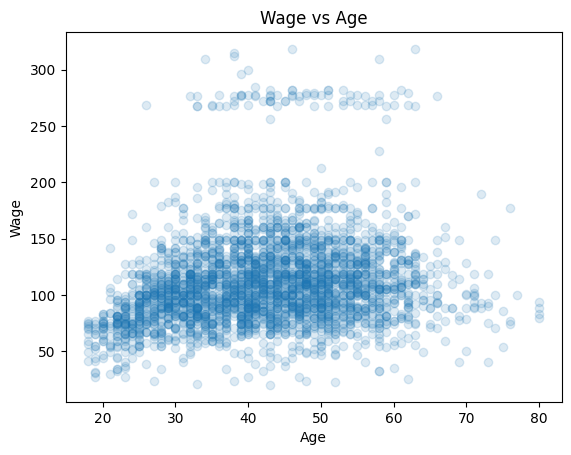

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

wage = sm.datasets.get_rdataset("Wage", "ISLR").data

fig, ax = plt.subplots()
ax.scatter(wage["age"], wage["wage"], alpha=0.15)
ax.set(xlabel="Age", ylabel="Wage", title="Wage vs Age");

wage.head()

Please predict `Wage` from `Age` using four different models:

1. A polynomial regression model of degree 3
2. A stepwise model with cut points at 30, 50, and 65 years
3. A third order spline regression model with `df=6`
4. A lowes local regression model with `frac=0.4`

Plot the resulting model fits in a single figure.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = ...
X_poly = ...
poly_mod = ...

In [ ]:
import patsy
import statsmodels.api as sm

cuts = [35, 50, 65]

step_basis = ...
step_mod = ...

In [ ]:
spline_basis = ...
spline_mod = ...

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

low_mod = ...

We can then plot all the models:

In [ ]:
age_grid = np.linspace(wage["age"].min(), wage["age"].max(), 300)

# TODO: Plot models

## Exercise 7: Generalized Additive Models

Objective: Understand how the number of basis functions (df) and the polynomial degree (degree) affect the flexibility of a spline and the resulting fit in a Generalized Additive Model.

1. Use the diabetes dataset and focus on the relationship between `bmi` and `target`.
2. We want to test different combinations of parameters. For the dfs, please use 4, 6, 12. For the degree, please use 2 and 3 (quadratic and cubic).
3. Fit the GAMs for each parameter combination. The resulting models will be plotted automatically for visual comparison.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from statsmodels.gam.api import GLMGam, BSplines

# TODO: 1. Get bmi as x and the target as y
data = load_diabetes(as_frame=True)
x = ...
y = ...

# TODO: 2. Define possible parameters
df_values = ...
degree_values = ...

# TODO: 3. Plot partial effect for each combination of df and degree
fig, axes = plt.subplots(len(df_values), len(degree_values), figsize=(15, 10), sharey=True)

for i, df_val in enumerate(df_values):
    for j, deg_val in enumerate(degree_values):
        bs = BSplines(...)
        gam = GLMGam(...)
        res = gam.fit()

        res.plot_partial(0, cpr=True, ax=axes[i, j])
        axes[i, j].set_title(f'B-spline: df={df_val}, degree={deg_val}')
        axes[i, j].set_xlabel('BMI')
        axes[i, j].set_ylabel('Effect')

plt.tight_layout()
plt.show()

We now use the [wage](https://islp.readthedocs.io/en/latest/datasets/Wage.html) dataset, which contains income information for a group of workers, along with demographic and employment-related features such as age, education, marital status, and job class.

1) Explore the dataset
    - Which variables are numeric?
    - Which ones are categorical?

2) Fit a GAM predicting `wage` from `age`, `year`, `education`, `jobclass`, and `maritl`

Note: For categorical features we use a one-hot encoding with `pd.get_dummies()`

In [ ]:
import pandas as pd
from ISLP import load_data
from statsmodels.gam.api import GLMGam, BSplines

# Load data
Wage = load_data('Wage')

# Continuous features
smoooth_features = ...
X_spline = Wage[smoooth_features]

# Categorical features — one-hot encode
categoricals = ...
X_cat = pd.get_dummies(Wage[categoricals], drop_first=True)

# Outcome
y = ...

# Create BSpline basis
bs = BSplines(...)

# Fit GAM
gam = GLMGam(...)
res = gam.fit()

print(res.summary())

## Exercise 8: Trees

1. Inspect the data
    - How many features are there and what are they?
    - What is the target?

2. Split the data into a train and test set, and make sure the classes are equally distributed (`stratify=y`)

3. Fit the DecisionTreeClassifier(max_depth=3) and report train vs. test accuracy.

4. Tree inspection (discuss in group)
    - After fitting the model, the tree will be plotted automatically
    - What is the very first split (feature name and threshold)?
    - Which leaf nodes are pure, and which have mixed classes?

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

diab = fetch_openml("diabetes", version=1, as_frame=True)
X = diab.data
y = diab.target

See if you can improve the classification performance with a random forest classifier and hyperparameter tuning.

1. Set up the clasifier + a parameter grid for grid search with 5-fold CV
    - n_estimators: 50, 100, 200
    - max_depth: None, 10, 20
    - min_samples_split: 2, 5, 10
    - max_features: "sqrt", "log2", 0.5

2. Fit the model with the grid search

3. Print the best hyperparameters

4. Evaluate the best model on the test set

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

## Exercise 10: SVMs

For the SVM exercises we will use the `fmri` dataset from `seaborn`, which contains measurements of brain activity (`signal`) in two brain regions (`frontal` and `parietal`) under two event types (`stim` vs. `cue`).

In [ ]:
import seaborn as sns
df = sns.load_dataset("fmri")
df

We will try to answer a very simple research question:

> Can we distinguish between `cue` and `stim` events based on the fMRI signal in the `parietal` and `frontal` brain regions?

To do this, we need to turn the long‐format data into a classic “feature matrix” (one row = one sample, two columns = our two brain‐region signals) plus a corresponding label vector (cue/stim):

In [ ]:
df_wide = df.pivot_table(
    index=["subject","timepoint","event"],
    columns="region",
    values="signal"
).reset_index()
df_wide.columns.name = None

X = df_wide[["frontal","parietal"]] 
y = df_wide["event"].map({"cue":0,"stim":1})

print("\nFeatures:")
print(X.head())
print("\nTarget:")
print(y.head())

With the features and target in the correct form, please perform the following tasks:

1. Split the data into a train and test set
2. Scale the predictors to mean 0 and std 1
3. Fit a linear as well as a rbf SVC and **discuss the classification reports**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(...)

# 2. TODO: Scale the features after splitting (important to avoid data leakage)
scaler = StandardScaler()
X_train_sc = ...
X_test_sc  = ...

# 3. TODO: Fit the SVC models and compare the classification reports
clf_lin = ...

clf_rbf = ...

After fitting both models, you can run the code chunk below to plot the decision boundary:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_svc_decision_function(model, ax=None):
    """Plot the decision boundary for a trained 2D SVC model."""
    # Set up grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    decision_values = model.decision_function(grid).reshape(xx.shape)
    ax.contour(xx, yy, decision_values, levels=[0], linestyles=['-'], colors='k')

# Plot
fig, ax = plt.subplots(1,2, figsize=(12, 6))

legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', markersize=8, label='Cue', markerfacecolor="#0173B2", markeredgecolor='None'),
    Line2D([0], [0], marker='o', linestyle='None', markersize=8, label='Stim', markerfacecolor="#DE8F05", markeredgecolor='None'),
    Line2D([0], [0], color='k', linestyle='-', label='Decision boundary')]

# Linear SVC
sns.scatterplot(x = X_train_sc[:, 0], y = X_train_sc[:, 1], hue = y_train.map({0:"cue",1:"stim"}), palette = ["#0173B2", "#DE8F05"], s = 60, ax = ax[0], legend=None)
ax[0].set(xlabel = "Frontal signal (scaled)", ylabel = "Parietal signal (scaled)", title  = "Linear SVC Decision Boundary")
plot_svc_decision_function(clf_lin, ax=ax[0])
ax[0].legend(handles=legend_elements, loc="upper left", handlelength=1)

# RBF SVC
sns.scatterplot(x = X_train_sc[:, 0], y = X_train_sc[:, 1], hue = y_train.map({0:"cue",1:"stim"}), palette = ["#0173B2", "#DE8F05"], s = 60, ax = ax[1], legend=None)
ax[1].set(xlabel = "Frontal signal (scaled)", ylabel = "Parietal signal (scaled)", title  = "RBF SVC Decision Boundary")
plot_svc_decision_function(clf_rbf, ax=ax[1])
ax[1].legend(handles=legend_elements, loc="upper left", handlelength=1);

Training a Support Vector Classifier (SVC) on more complex datasets often requires a systematic hyperparameter search to identify optimal model settings.

Implement a grid search that explores multiple kernels and their corresponding hyperparameters using the following configuration:

- **Kernels:** `rbf`, `linear`
- **C:** `np.logspace(-2, 2, 10)`
- **gamma:** `np.logspace(-3, 1, 10)` (for `rbf`)

Further use:

- **Cross-validation:** 5-fold
- **Scoring metric:** accuracy

*Note: Usually you would use a finer grid, but we keep it simpler for the sake of the exercise.*

After fitting the model:

1. Print the optimal hyperparameters
2. Print the best cross-validation accuracy
3. Print the test accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

param_grid = [
    # RBF kernel
    {
        ...
    },
    # Linear kernel
    {
        ...
    }
]

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_sc, y_train)

print("Best params:", ...)
print("CV accuracy:", ...)
print("Test accuracy:", ...)